In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install --pre deepchem

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
import deepchem as dc
dc.__version__
import warnings
warnings.filterwarnings('ignore')


wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.
Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead
wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.


In [3]:
dc.molnet.load_hiv


<function deepchem.molnet.load_function.hiv_datasets.load_hiv(featurizer: Union[deepchem.feat.base_classes.Featurizer, str] = 'ECFP', splitter: Union[deepchem.splits.splitters.Splitter, str, NoneType] = 'scaffold', transformers: List[Union[deepchem.molnet.load_function.molnet_loader.TransformerGenerator, str]] = ['balancing'], reload: bool = True, data_dir: Optional[str] = None, save_dir: Optional[str] = None, **kwargs) -> Tuple[List[str], Tuple[deepchem.data.datasets.Dataset, ...], List[transformers.Transformer]]>

1. dtype
2. remove unnecessary columns
3. check shape
4. rearrange columns
5. rename columns if necessary
6. missing values in the data w/ 'isna' command
7. check for duplicated rows
8. remove duplicated rows. make the df size (170, n)
9. set that as new df
10. fill NA data with mean values


In [4]:
adult_df = pd.read_csv('/content/drive/MyDrive/no_of_cases_adults_15_to_49_by_country_clean.csv')
adult_df.head()

,Country,Year,Count,Count_median,Count_min,Count_max,WHO Region
0,Afghanistan,2018,0.1[0.1–0.1],0.1,0.1,0.1,Eastern Mediterranean
1,Albania,2018,na,NaN,NaN,NaN,Europe
2,Algeria,2018,0.1[0.1–0.1],0.1,0.1,0.1,Africa
3,Angola,2018,2.0[1.7–2.3],2.0,1.7,2.3,Africa
4,Argentina,2018,0.4[0.4–0.4],0.4,0.4,0.4,Americas


In [5]:
adult_df.shape

(680, 7)

In [6]:
adult_df.dtypes

,0
Country,object
Year,int64
Count,object
Count_median,float64
Count_min,float64
Count_max,float64
WHO Region,object


In [7]:
adult_df = adult_df[['Country','Count_median','WHO Region']].copy()
       # 'Count', 'Year','Count_min', 'Count_max'

In [8]:
ColumnNames = list(adult_df.columns)
ColumnNames

['Country', 'Count_median', 'WHO Region']

In [9]:
adult_df = adult_df.rename(columns={'Count_median':'Estimated number of HIV cases among adults aged 15-49'})

In [10]:
adult_df.head(10)

,Country,Estimated number of HIV cases among adults aged 15-49,WHO Region
0,Afghanistan,0.1,Eastern Mediterranean
1,Albania,NaN,Europe
2,Algeria,0.1,Africa
3,Angola,2.0,Africa
4,Argentina,0.4,Americas
5,Armenia,0.2,Europe
6,Australia,0.1,Western Pacific
7,Austria,NaN,Europe
8,Azerbaijan,NaN,Europe
9,Bahamas,1.8,Americas


In [11]:
adult_df.shape

(680, 3)

In [12]:
adult_df.duplicated(subset=['Country']).sum()

510

In [13]:
adult_df.query('Country == "Afghanistan"')

,Country,Estimated number of HIV cases among adults aged 15-49,WHO Region
0,Afghanistan,0.1,Eastern Mediterranean
170,Afghanistan,0.1,Eastern Mediterranean
340,Afghanistan,0.1,Eastern Mediterranean
510,Afghanistan,0.1,Eastern Mediterranean


In [14]:
adult_df.loc[~adult_df.duplicated(subset=['Country'])]

,Country,Estimated number of HIV cases among adults aged 15-49,WHO Region
0,Afghanistan,0.1,Eastern Mediterranean
1,Albania,NaN,Europe
2,Algeria,0.1,Africa
3,Angola,2.0,Africa
4,Argentina,0.4,Americas
...,...,...,...
165,Venezuela (Bolivarian Republic of),NaN,Americas
166,Viet Nam,0.3,Western Pacific
167,Yemen,0.1,Eastern Mediterranean
168,Zambia,11.3,Africa


In [15]:
adult_df = adult_df.loc[~adult_df.duplicated(subset=['Country'])].copy()

In [16]:
adult_df.shape

(170, 3)

In [17]:
adult_df.isnull().sum()

,0
Country,0
Estimated number of HIV cases among adults aged 15-49,32
WHO Region,0


In [18]:
adult_df

,Country,Estimated number of HIV cases among adults aged 15-49,WHO Region
0,Afghanistan,0.1,Eastern Mediterranean
1,Albania,NaN,Europe
2,Algeria,0.1,Africa
3,Angola,2.0,Africa
4,Argentina,0.4,Americas
...,...,...,...
165,Venezuela (Bolivarian Republic of),NaN,Americas
166,Viet Nam,0.3,Western Pacific
167,Yemen,0.1,Eastern Mediterranean
168,Zambia,11.3,Africa


In [19]:
adult_df.dtypes

,0
Country,object
Estimated number of HIV cases among adults aged 15-49,float64
WHO Region,object


In [20]:
dead_df = pd.read_csv('/content/drive/MyDrive/no_of_deaths_by_country_clean.csv')
dead_df.head()

,Country,Year,Count,Count_median,Count_min,Count_max,WHO Region
0,Afghanistan,2018,500[200–610],500.0,200.0,610.0,Eastern Mediterranean
1,Albania,2018,na,NaN,NaN,NaN,Europe
2,Algeria,2018,200[200–200],200.0,200.0,200.0,Africa
3,Angola,2018,14000[9500–18000],14000.0,9500.0,18000.0,Africa
4,Argentina,2018,1700[1300–2100],1700.0,1300.0,2100.0,Americas


In [21]:
dead_df.dtypes

,0
Country,object
Year,int64
Count,object
Count_median,float64
Count_min,float64
Count_max,float64
WHO Region,object


In [22]:
dead_df = dead_df[['Country','Count_median', 'WHO Region']].copy()
       #'Count_min', 'Count_max'
       #'Count' 'Year'

In [23]:
ColumnNames = list(dead_df.columns)
ColumnNames

['Country', 'Count_median', 'WHO Region']

In [24]:
dead_df = dead_df.rename(columns={'Count_median':'Estimated number of deaths due to HIV'})

In [25]:
dead_df.head(10)

,Country,Estimated number of deaths due to HIV,WHO Region
0,Afghanistan,500.0,Eastern Mediterranean
1,Albania,NaN,Europe
2,Algeria,200.0,Africa
3,Angola,14000.0,Africa
4,Argentina,1700.0,Americas
5,Armenia,200.0,Europe
6,Australia,200.0,Western Pacific
7,Austria,NaN,Europe
8,Azerbaijan,NaN,Europe
9,Bahamas,200.0,Americas


In [26]:
dead_df.shape

(510, 3)

In [27]:
dead_df.duplicated(subset=['Country']).sum()

340

In [28]:
dead_df.query('Country == "Afghanistan"')

,Country,Estimated number of deaths due to HIV,WHO Region
0,Afghanistan,500.0,Eastern Mediterranean
170,Afghanistan,500.0,Eastern Mediterranean
340,Afghanistan,100.0,Eastern Mediterranean


In [29]:
dead_df.loc[~dead_df.duplicated(subset=['Country'])]

,Country,Estimated number of deaths due to HIV,WHO Region
0,Afghanistan,500.0,Eastern Mediterranean
1,Albania,NaN,Europe
2,Algeria,200.0,Africa
3,Angola,14000.0,Africa
4,Argentina,1700.0,Americas
...,...,...,...
165,Venezuela (Bolivarian Republic of),NaN,Americas
166,Viet Nam,4700.0,Western Pacific
167,Yemen,500.0,Eastern Mediterranean
168,Zambia,17000.0,Africa


In [30]:
dead_df = dead_df.loc[~dead_df.duplicated(subset=['Country'])].copy()

In [31]:
dead_df.shape

(170, 3)

In [32]:
dead_df.isnull().sum()

,0
Country,0
Estimated number of deaths due to HIV,37
WHO Region,0


In [33]:
dead_df

,Country,Estimated number of deaths due to HIV,WHO Region
0,Afghanistan,500.0,Eastern Mediterranean
1,Albania,NaN,Europe
2,Algeria,200.0,Africa
3,Angola,14000.0,Africa
4,Argentina,1700.0,Americas
...,...,...,...
165,Venezuela (Bolivarian Republic of),NaN,Americas
166,Viet Nam,4700.0,Western Pacific
167,Yemen,500.0,Eastern Mediterranean
168,Zambia,17000.0,Africa


In [34]:
alive_df = pd.read_csv('/content/drive/MyDrive/no_of_people_living_with_hiv_by_country_clean.csv')
alive_df.head()

,Country,Year,Count,Count_median,Count_min,Count_max,WHO Region
0,Afghanistan,2018,7200[4100–11000],7200.0,4100.0,11000.0,Eastern Mediterranean
1,Albania,2018,na,NaN,NaN,NaN,Europe
2,Algeria,2018,16000[15000–17000],16000.0,15000.0,17000.0,Africa
3,Angola,2018,330000[290000–390000],330000.0,290000.0,390000.0,Africa
4,Argentina,2018,140000[130000–150000],140000.0,130000.0,150000.0,Americas


In [35]:
alive_df[['Country','Count_median','WHO Region']]
       #    #'Count', 'Count_min', 'Count_max'  'Year',

,Country,Count_median,WHO Region
0,Afghanistan,7200.0,Eastern Mediterranean
1,Albania,NaN,Europe
2,Algeria,16000.0,Africa
3,Angola,330000.0,Africa
4,Argentina,140000.0,Americas
...,...,...,...
675,Venezuela (Bolivarian Republic of),NaN,Americas
676,Viet Nam,120000.0,Western Pacific
677,Yemen,1100.0,Eastern Mediterranean
678,Zambia,890000.0,Africa


In [36]:
alive_df = alive_df[['Country','Count_median','WHO Region']].copy()
       #    #'Count', 'Count_min', 'Count_max'  'Year',

In [37]:
ColumnNames = list(alive_df.columns)
ColumnNames

['Country', 'Count_median', 'WHO Region']

In [38]:
alive_df = alive_df.rename(columns={'Count_median':'Estimated number of people living with HIV'})

In [39]:
alive_df.head(10)

,Country,Estimated number of people living with HIV,WHO Region
0,Afghanistan,7200.0,Eastern Mediterranean
1,Albania,NaN,Europe
2,Algeria,16000.0,Africa
3,Angola,330000.0,Africa
4,Argentina,140000.0,Americas
5,Armenia,3500.0,Europe
6,Australia,28000.0,Western Pacific
7,Austria,NaN,Europe
8,Azerbaijan,NaN,Europe
9,Bahamas,6000.0,Americas


In [40]:
alive_df.shape

(680, 3)

In [41]:
alive_df.duplicated(subset=['Country']).sum()

510

In [42]:
alive_df.query('Country == "Afghanistan"')

,Country,Estimated number of people living with HIV,WHO Region
0,Afghanistan,7200.0,Eastern Mediterranean
170,Afghanistan,4200.0,Eastern Mediterranean
340,Afghanistan,2900.0,Eastern Mediterranean
510,Afghanistan,1600.0,Eastern Mediterranean


In [43]:
alive_df.loc[~alive_df.duplicated(subset=['Country'])]

,Country,Estimated number of people living with HIV,WHO Region
0,Afghanistan,7200.0,Eastern Mediterranean
1,Albania,NaN,Europe
2,Algeria,16000.0,Africa
3,Angola,330000.0,Africa
4,Argentina,140000.0,Americas
...,...,...,...
165,Venezuela (Bolivarian Republic of),120000.0,Americas
166,Viet Nam,230000.0,Western Pacific
167,Yemen,11000.0,Eastern Mediterranean
168,Zambia,1200000.0,Africa


In [44]:
alive_df = alive_df.loc[~alive_df.duplicated(subset=['Country'])].copy()

In [45]:
alive_df.shape

(170, 3)

In [46]:
alive_df.isnull().sum()

,0
Country,0
Estimated number of people living with HIV,32
WHO Region,0


In [47]:
alive_df

,Country,Estimated number of people living with HIV,WHO Region
0,Afghanistan,7200.0,Eastern Mediterranean
1,Albania,NaN,Europe
2,Algeria,16000.0,Africa
3,Angola,330000.0,Africa
4,Argentina,140000.0,Americas
...,...,...,...
165,Venezuela (Bolivarian Republic of),120000.0,Americas
166,Viet Nam,230000.0,Western Pacific
167,Yemen,11000.0,Eastern Mediterranean
168,Zambia,1200000.0,Africa


In [48]:
ART_df = pd.read_csv('/content/drive/MyDrive/art_coverage_by_country_clean.csv')
ART_df.head()

,Country,Reported number of people receiving ART,Estimated number of people living with HIV,Estimated ART coverage among people living with HIV (%),Estimated number of people living with HIV_median,Estimated number of people living with HIV_min,Estimated number of people living with HIV_max,Estimated ART coverage among people living with HIV (%)_median,Estimated ART coverage among people living with HIV (%)_min,Estimated ART coverage among people living with HIV (%)_max,WHO Region
0,Afghanistan,920,7200[4100–11000],13[7–20],7200.0,4100.0,11000.0,13.0,7.0,20.0,Eastern Mediterranean
1,Albania,580,Nodata,Nodata,NaN,NaN,NaN,NaN,NaN,NaN,Europe
2,Algeria,12800,16000[15000–17000],81[75–86],16000.0,15000.0,17000.0,81.0,75.0,86.0,Africa
3,Angola,88700,330000[290000–390000],27[23–31],330000.0,290000.0,390000.0,27.0,23.0,31.0,Africa
4,Argentina,85500,140000[130000–150000],61[55–67],140000.0,130000.0,150000.0,61.0,55.0,67.0,Americas


In [49]:
ART_df.dtypes

,0
Country,object
Reported number of people receiving ART,object
Estimated number of people living with HIV,object
Estimated ART coverage among people living with HIV (%),object
Estimated number of people living with HIV_median,float64
Estimated number of people living with HIV_min,float64
Estimated number of people living with HIV_max,float64
Estimated ART coverage among people living with HIV (%)_median,float64
Estimated ART coverage among people living with HIV (%)_min,float64
Estimated ART coverage among people living with HIV (%)_max,float64


In [50]:
ART_df = ART_df[['Country', 'Reported number of people receiving ART',
       'Estimated number of people living with HIV_median',
       'Estimated ART coverage among people living with HIV (%)_median', 'WHO Region']].copy()
       #'Estimated number of people living with HIV',
       #'Estimated ART coverage among people living with HIV (%)',
       #'Estimated ART coverage among people living with HIV (%)_min',
       #'Estimated ART coverage among people living with HIV (%)_max',
       #'Estimated number of people living with HIV_min',
      #'Estimated number of people living with HIV_max',

In [51]:
ART_df.head()

,Country,Reported number of people receiving ART,Estimated number of people living with HIV_median,Estimated ART coverage among people living with HIV (%)_median,WHO Region
0,Afghanistan,920,7200.0,13.0,Eastern Mediterranean
1,Albania,580,NaN,NaN,Europe
2,Algeria,12800,16000.0,81.0,Africa
3,Angola,88700,330000.0,27.0,Africa
4,Argentina,85500,140000.0,61.0,Americas


In [52]:
ColumnNames = list(ART_df.columns)
ColumnNames

['Country',
 'Reported number of people receiving ART',
 'Estimated number of people living with HIV_median',
 'Estimated ART coverage among people living with HIV (%)_median',
 'WHO Region']

In [53]:
ART_df = ART_df.rename(columns={'Reported number of people receiving ART':'Reported number of people receiving AntiRetroviral Therapy (ART)',
    'Estimated number of people living with HIV_median':'Estimated number of people living with HIV',
                     'Estimated ART coverage among people living with HIV (%)_median':'Estimated ART coverage percent among adults living with HIV(%)' })

In [54]:
ART_df.head(10)

,Country,Reported number of people receiving AntiRetroviral Therapy (ART),Estimated number of people living with HIV,Estimated ART coverage percent among adults living with HIV(%),WHO Region
0,Afghanistan,920,7200.0,13.0,Eastern Mediterranean
1,Albania,580,NaN,NaN,Europe
2,Algeria,12800,16000.0,81.0,Africa
3,Angola,88700,330000.0,27.0,Africa
4,Argentina,85500,140000.0,61.0,Americas
5,Armenia,1900,3500.0,53.0,Europe
6,Australia,22800,28000.0,83.0,Western Pacific
7,Austria,Nodata,NaN,NaN,Europe
8,Azerbaijan,4400,NaN,NaN,Europe
9,Bahamas,3100,6000.0,52.0,Americas


In [55]:
ART_df.shape

(170, 5)

In [56]:
ART_df.duplicated(subset=['Country']).sum()

0

In [57]:
ART_df.isnull().sum()

,0
Country,0
Reported number of people receiving AntiRetroviral Therapy (ART),0
Estimated number of people living with HIV,32
Estimated ART coverage percent among adults living with HIV(%),34
WHO Region,0


In [58]:
ART_df

,Country,Reported number of people receiving AntiRetroviral Therapy (ART),Estimated number of people living with HIV,Estimated ART coverage percent among adults living with HIV(%),WHO Region
0,Afghanistan,920,7200.0,13.0,Eastern Mediterranean
1,Albania,580,NaN,NaN,Europe
2,Algeria,12800,16000.0,81.0,Africa
3,Angola,88700,330000.0,27.0,Africa
4,Argentina,85500,140000.0,61.0,Americas
...,...,...,...,...,...
165,Venezuela (Bolivarian Republic of),Nodata,120000.0,NaN,Americas
166,Viet Nam,150000,230000.0,65.0,Western Pacific
167,Yemen,2200,11000.0,21.0,Eastern Mediterranean
168,Zambia,965000,1200000.0,78.0,Africa


In [59]:
paediatric_ART_df = pd.read_csv('/content/drive/MyDrive/art_pediatric_coverage_by_country_clean.csv')
paediatric_ART_df.head()

,Country,Reported number of children receiving ART,Estimated number of children needing ART based on WHO methods,Estimated ART coverage among children (%),Estimated number of children needing ART based on WHO methods_median,Estimated number of children needing ART based on WHO methods_min,Estimated number of children needing ART based on WHO methods_max,Estimated ART coverage among children (%)_median,Estimated ART coverage among children (%)_min,Estimated ART coverage among children (%)_max,WHO Region
0,Afghanistan,60,500[500-530],17[10-26],500.0,500.0,530.0,17.0,10.0,26.0,Eastern Mediterranean
1,Albania,20,Nodata,Nodata,NaN,NaN,NaN,NaN,NaN,NaN,Europe
2,Algeria,770,500[500-520],95[95-95],500.0,500.0,520.0,95.0,95.0,95.0,Africa
3,Angola,4800,38000[30000-47000],13[10-16],38000.0,30000.0,47000.0,13.0,10.0,16.0,Africa
4,Argentina,1700,1800[1600-2100],92[84-95],1800.0,1600.0,2100.0,92.0,84.0,95.0,Americas


In [60]:
paediatric_ART_df.dtypes

,0
Country,object
Reported number of children receiving ART,object
Estimated number of children needing ART based on WHO methods,object
Estimated ART coverage among children (%),object
Estimated number of children needing ART based on WHO methods_median,float64
Estimated number of children needing ART based on WHO methods_min,float64
Estimated number of children needing ART based on WHO methods_max,float64
Estimated ART coverage among children (%)_median,float64
Estimated ART coverage among children (%)_min,float64
Estimated ART coverage among children (%)_max,float64


In [61]:
paediatric_ART_df = paediatric_ART_df[['Country', 'Reported number of children receiving ART',
       'Estimated ART coverage among children (%)_median',
       'Estimated number of children needing ART based on WHO methods_median',
       'WHO Region']].copy()
       #'Estimated number of children needing ART based on WHO methods',
       #'Estimated ART coverage among children (%)'
       #'Estimated ART coverage among children (%)_min', 'Estimated number of children needing ART based on WHO methods_min',
       #'Estimated number of children needing ART based on WHO methods_max'
       #'Estimated ART coverage among children (%)_max',

In [62]:
paediatric_ART_df.shape

(170, 5)

In [63]:
ColumnNames = list(paediatric_ART_df.columns)
ColumnNames

['Country',
 'Reported number of children receiving ART',
 'Estimated ART coverage among children (%)_median',
 'Estimated number of children needing ART based on WHO methods_median',
 'WHO Region']

In [64]:
ColumnNames[2], ColumnNames[3] = ColumnNames[3], ColumnNames[2]
ColumnNames

['Country',
 'Reported number of children receiving ART',
 'Estimated number of children needing ART based on WHO methods_median',
 'Estimated ART coverage among children (%)_median',
 'WHO Region']

In [65]:
paediatric_ART_df = paediatric_ART_df[ColumnNames]
ColumnNames

['Country',
 'Reported number of children receiving ART',
 'Estimated number of children needing ART based on WHO methods_median',
 'Estimated ART coverage among children (%)_median',
 'WHO Region']

In [66]:
paediatric_ART_df = paediatric_ART_df.rename(columns={'Reported number of children receiving ART':'Reported number of children receiving AntiRetroviral Therapy (ART)',
                                                      'Estimated number of children needing ART based on WHO methods_median':'Estimated number of children needing ART based on WHO methods',
                                                      'Estimated ART coverage among children (%)_median':'Estimated ART coverage percent among children(%)' })

In [67]:
paediatric_ART_df.head()

,Country,Reported number of children receiving AntiRetroviral Therapy (ART),Estimated number of children needing ART based on WHO methods,Estimated ART coverage percent among children(%),WHO Region
0,Afghanistan,60,500.0,17.0,Eastern Mediterranean
1,Albania,20,NaN,NaN,Europe
2,Algeria,770,500.0,95.0,Africa
3,Angola,4800,38000.0,13.0,Africa
4,Argentina,1700,1800.0,92.0,Americas


In [68]:
paediatric_ART_df.shape

(170, 5)

In [69]:
paediatric_ART_df.duplicated(subset=['Country']).sum()

0

In [70]:
paediatric_ART_df.isnull().sum()

,0
Country,0
Reported number of children receiving AntiRetroviral Therapy (ART),0
Estimated number of children needing ART based on WHO methods,68
Estimated ART coverage percent among children(%),77
WHO Region,0


In [71]:
paediatric_ART_df

,Country,Reported number of children receiving AntiRetroviral Therapy (ART),Estimated number of children needing ART based on WHO methods,Estimated ART coverage percent among children(%),WHO Region
0,Afghanistan,60,500.0,17.0,Eastern Mediterranean
1,Albania,20,NaN,NaN,Europe
2,Algeria,770,500.0,95.0,Africa
3,Angola,4800,38000.0,13.0,Africa
4,Argentina,1700,1800.0,92.0,Americas
...,...,...,...,...,...
165,Venezuela (Bolivarian Republic of),No data,NaN,NaN,Americas
166,Viet Nam,4600,5000.0,92.0,Western Pacific
167,Yemen,130,500.0,33.0,Eastern Mediterranean
168,Zambia,49 100,62000.0,79.0,Africa


In [72]:
prevention_df = pd.read_csv('/content/drive/MyDrive/prevention_of_mother_to_child_transmission_by_country_clean.csv')
prevention_df.head()

,Country,Received Antiretrovirals,Needing antiretrovirals,Percentage Recieved,Needing antiretrovirals_median,Needing antiretrovirals_min,Needing antiretrovirals_max,Percentage Recieved_median,Percentage Recieved_min,Percentage Recieved_max,WHO Region
0,Afghanistan,20,200[100–500],11[7–18],200.0,100.0,500.0,11.0,7.0,18.0,Eastern Mediterranean
1,Albania,No data,Nodata,Nodata,NaN,NaN,NaN,NaN,NaN,NaN,Europe
2,Algeria,320,500[500–500],74[69–78],500.0,500.0,500.0,74.0,69.0,78.0,Africa
3,Angola,9600,25000[19000–32000],38[29–48],25000.0,19000.0,32000.0,38.0,29.0,48.0,Africa
4,Argentina,1800,1800[1600–2000],95[85–95],1800.0,1600.0,2000.0,95.0,85.0,95.0,Americas


In [73]:
prevention_df.dtypes

,0
Country,object
Received Antiretrovirals,object
Needing antiretrovirals,object
Percentage Recieved,object
Needing antiretrovirals_median,float64
Needing antiretrovirals_min,float64
Needing antiretrovirals_max,float64
Percentage Recieved_median,float64
Percentage Recieved_min,float64
Percentage Recieved_max,float64


In [74]:
prevention_df = prevention_df[['Country','Received Antiretrovirals' ,
       'Percentage Recieved_median', 'Needing antiretrovirals_median',
       'WHO Region']].copy()
               #'Needing antiretrovirals',
       # 'Percentage Recieved_min',
       #'Percentage Recieved_max', 'Percentage Recieved'
#'Needing antiretrovirals_min', 'Needing antiretrovirals_max'

In [75]:
prevention_df.shape

(170, 5)

In [76]:
ColumnNames = list(prevention_df.columns)
ColumnNames

['Country',
 'Received Antiretrovirals',
 'Percentage Recieved_median',
 'Needing antiretrovirals_median',
 'WHO Region']

In [77]:
ColumnNames[2], ColumnNames[3] = ColumnNames[3], ColumnNames[2]
ColumnNames

['Country',
 'Received Antiretrovirals',
 'Needing antiretrovirals_median',
 'Percentage Recieved_median',
 'WHO Region']

In [78]:
prevention_df = prevention_df[ColumnNames]
ColumnNames

['Country',
 'Received Antiretrovirals',
 'Needing antiretrovirals_median',
 'Percentage Recieved_median',
 'WHO Region']

In [79]:
prevention_df = prevention_df.rename(columns={ 'Received Antiretrovirals':'Reported number of expecting women receiving Anti Retroviral Therapy',
                                              'Percentage Recieved_median':'Estimated ART coverage percent among expecting mothers(%)',
                                               'Needing antiretrovirals_median':'Estimated number of expecting women needing ART'})

In [80]:
prevention_df.head()

,Country,Reported number of expecting women receiving Anti Retroviral Therapy,Estimated number of expecting women needing ART,Estimated ART coverage percent among expecting mothers(%),WHO Region
0,Afghanistan,20,200.0,11.0,Eastern Mediterranean
1,Albania,No data,NaN,NaN,Europe
2,Algeria,320,500.0,74.0,Africa
3,Angola,9600,25000.0,38.0,Africa
4,Argentina,1800,1800.0,95.0,Americas


In [81]:
prevention_df.shape

(170, 5)

In [82]:
prevention_df.duplicated(subset=['Country']).sum()

0

In [83]:
prevention_df.isnull().sum()

,0
Country,0
Reported number of expecting women receiving Anti Retroviral Therapy,0
Estimated number of expecting women needing ART,70
Estimated ART coverage percent among expecting mothers(%),78
WHO Region,0


In [84]:
prevention_df

,Country,Reported number of expecting women receiving Anti Retroviral Therapy,Estimated number of expecting women needing ART,Estimated ART coverage percent among expecting mothers(%),WHO Region
0,Afghanistan,20,200.0,11.0,Eastern Mediterranean
1,Albania,No data,NaN,NaN,Europe
2,Algeria,320,500.0,74.0,Africa
3,Angola,9600,25000.0,38.0,Africa
4,Argentina,1800,1800.0,95.0,Americas
...,...,...,...,...,...
165,Venezuela (Bolivarian Republic of),410,NaN,NaN,Americas
166,Viet Nam,1900,2400.0,81.0,Western Pacific
167,Yemen,30,500.0,13.0,Eastern Mediterranean
168,Zambia,56 500,48000.0,95.0,Africa


In [85]:
merged_df = adult_df.merge(dead_df, on=['Country', 'WHO Region']).merge(alive_df, on=['Country', 'WHO Region']).merge(ART_df, on=['Country', 'WHO Region', 'Estimated number of people living with HIV']).merge(paediatric_ART_df, on=['Country', 'WHO Region']).merge(prevention_df, on=['Country', 'WHO Region'])

In [86]:
merged_df

,Country,Estimated number of HIV cases among adults aged 15-49,WHO Region,Estimated number of deaths due to HIV,Estimated number of people living with HIV,Reported number of people receiving AntiRetroviral Therapy (ART),Estimated ART coverage percent among adults living with HIV(%),Reported number of children receiving AntiRetroviral Therapy (ART),Estimated number of children needing ART based on WHO methods,Estimated ART coverage percent among children(%),Reported number of expecting women receiving Anti Retroviral Therapy,Estimated number of expecting women needing ART,Estimated ART coverage percent among expecting mothers(%)
0,Afghanistan,0.1,Eastern Mediterranean,500.0,7200.0,920,13.0,60,500.0,17.0,20,200.0,11.0
1,Albania,NaN,Europe,NaN,NaN,580,NaN,20,NaN,NaN,No data,NaN,NaN
2,Algeria,0.1,Africa,200.0,16000.0,12800,81.0,770,500.0,95.0,320,500.0,74.0
3,Angola,2.0,Africa,14000.0,330000.0,88700,27.0,4800,38000.0,13.0,9600,25000.0,38.0
4,Argentina,0.4,Americas,1700.0,140000.0,85500,61.0,1700,1800.0,92.0,1800,1800.0,95.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,Venezuela (Bolivarian Republic of),NaN,Americas,NaN,120000.0,Nodata,NaN,No data,NaN,NaN,410,NaN,NaN
166,Viet Nam,0.3,Western Pacific,4700.0,230000.0,150000,65.0,4600,5000.0,92.0,1900,2400.0,81.0
167,Yemen,0.1,Eastern Mediterranean,500.0,11000.0,2200,21.0,130,500.0,33.0,30,500.0,13.0
168,Zambia,11.3,Africa,17000.0,1200000.0,965000,78.0,49 100,62000.0,79.0,56 500,48000.0,95.0


In [87]:
col3 = merged_df['WHO Region']
merged_df = merged_df.drop('WHO Region', axis=1)
merged_df['WHO Region'] = col3
merged_df.head()

,Country,Estimated number of HIV cases among adults aged 15-49,Estimated number of deaths due to HIV,Estimated number of people living with HIV,Reported number of people receiving AntiRetroviral Therapy (ART),Estimated ART coverage percent among adults living with HIV(%),Reported number of children receiving AntiRetroviral Therapy (ART),Estimated number of children needing ART based on WHO methods,Estimated ART coverage percent among children(%),Reported number of expecting women receiving Anti Retroviral Therapy,Estimated number of expecting women needing ART,Estimated ART coverage percent among expecting mothers(%),WHO Region
0,Afghanistan,0.1,500.0,7200.0,920,13.0,60,500.0,17.0,20,200.0,11.0,Eastern Mediterranean
1,Albania,NaN,NaN,NaN,580,NaN,20,NaN,NaN,No data,NaN,NaN,Europe
2,Algeria,0.1,200.0,16000.0,12800,81.0,770,500.0,95.0,320,500.0,74.0,Africa
3,Angola,2.0,14000.0,330000.0,88700,27.0,4800,38000.0,13.0,9600,25000.0,38.0,Africa
4,Argentina,0.4,1700.0,140000.0,85500,61.0,1700,1800.0,92.0,1800,1800.0,95.0,Americas


In [88]:
merged_df.dtypes

,0
Country,object
Estimated number of HIV cases among adults aged 15-49,float64
Estimated number of deaths due to HIV,float64
Estimated number of people living with HIV,float64
Reported number of people receiving AntiRetroviral Therapy (ART),object
Estimated ART coverage percent among adults living with HIV(%),float64
Reported number of children receiving AntiRetroviral Therapy (ART),object
Estimated number of children needing ART based on WHO methods,float64
Estimated ART coverage percent among children(%),float64
Reported number of expecting women receiving Anti Retroviral Therapy,object


In [89]:
merged_df.isnull().sum()

,0
Country,0
Estimated number of HIV cases among adults aged 15-49,32
Estimated number of deaths due to HIV,37
Estimated number of people living with HIV,32
Reported number of people receiving AntiRetroviral Therapy (ART),0
Estimated ART coverage percent among adults living with HIV(%),34
Reported number of children receiving AntiRetroviral Therapy (ART),0
Estimated number of children needing ART based on WHO methods,68
Estimated ART coverage percent among children(%),77
Reported number of expecting women receiving Anti Retroviral Therapy,0


In [90]:
from sklearn.impute import KNNImputer

In [91]:
# Select only the numerical columns for imputation
numerical_cols = merged_df.select_dtypes(include=np.number).columns

# Initialize KNNImputer
imputer = KNNImputer(n_neighbors=5)

# Apply imputation to the numerical columns
merged_df[numerical_cols] = imputer.fit_transform(merged_df[numerical_cols])

# Check for missing values after imputation
print(merged_df.isnull().sum())


Country                                                                 0
Estimated number of HIV cases among adults aged 15-49                   0
Estimated number of deaths due to HIV                                   0
Estimated number of people living with HIV                              0
Reported number of people receiving AntiRetroviral Therapy (ART)        0
Estimated ART coverage percent among adults living with HIV(%)          0
Reported number of children receiving AntiRetroviral Therapy (ART)      0
Estimated number of children needing ART based on WHO methods           0
Estimated ART coverage percent among children(%)                        0
Reported number of expecting women receiving Anti Retroviral Therapy    0
Estimated number of expecting women needing ART                         0
Estimated ART coverage percent among expecting mothers(%)               0
WHO Region                                                              0
dtype: int64


In [92]:
merged_df.isna().sum()

,0
Country,0
Estimated number of HIV cases among adults aged 15-49,0
Estimated number of deaths due to HIV,0
Estimated number of people living with HIV,0
Reported number of people receiving AntiRetroviral Therapy (ART),0
Estimated ART coverage percent among adults living with HIV(%),0
Reported number of children receiving AntiRetroviral Therapy (ART),0
Estimated number of children needing ART based on WHO methods,0
Estimated ART coverage percent among children(%),0
Reported number of expecting women receiving Anti Retroviral Therapy,0


In [93]:
merged_df

,Country,Estimated number of HIV cases among adults aged 15-49,Estimated number of deaths due to HIV,Estimated number of people living with HIV,Reported number of people receiving AntiRetroviral Therapy (ART),Estimated ART coverage percent among adults living with HIV(%),Reported number of children receiving AntiRetroviral Therapy (ART),Estimated number of children needing ART based on WHO methods,Estimated ART coverage percent among children(%),Reported number of expecting women receiving Anti Retroviral Therapy,Estimated number of expecting women needing ART,Estimated ART coverage percent among expecting mothers(%),WHO Region
0,Afghanistan,0.100000,500.000000,7.200000e+03,920,13.000000,60,500.000000,17.000000,20,200.0,11.00000,Eastern Mediterranean
1,Albania,1.871739,4553.759398,2.273377e+05,580,55.551471,20,15963.921569,48.741935,No data,12289.4,67.51087,Europe
2,Algeria,0.100000,200.000000,1.600000e+04,12800,81.000000,770,500.000000,95.000000,320,500.0,74.00000,Africa
3,Angola,2.000000,14000.000000,3.300000e+05,88700,27.000000,4800,38000.000000,13.000000,9600,25000.0,38.00000,Africa
4,Argentina,0.400000,1700.000000,1.400000e+05,85500,61.000000,1700,1800.000000,92.000000,1800,1800.0,95.00000,Americas
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,Venezuela (Bolivarian Republic of),1.780000,3342.000000,1.200000e+05,Nodata,55.600000,No data,9900.000000,37.000000,410,5100.0,73.40000,Americas
166,Viet Nam,0.300000,4700.000000,2.300000e+05,150000,65.000000,4600,5000.000000,92.000000,1900,2400.0,81.00000,Western Pacific
167,Yemen,0.100000,500.000000,1.100000e+04,2200,21.000000,130,500.000000,33.000000,30,500.0,13.00000,Eastern Mediterranean
168,Zambia,11.300000,17000.000000,1.200000e+06,965000,78.000000,49 100,62000.000000,79.000000,56 500,48000.0,95.00000,Africa


In [94]:
merged_df.replace(['No data', 'Nodata', 'NO DATA', 'nodata', 'No Data'], 0, inplace=True)

In [95]:
merged_df = merged_df.replace(to_replace='No data', value=0)
merged_df = merged_df.apply(pd.to_numeric, errors='ignore')

In [96]:
# List of columns to exclude from the check
exclude_columns = ['Country', 'WHO Region']

# Get all columns except the ones to exclude
columns_to_check = [col for col in merged_df.columns if col not in exclude_columns]

# Check for non-numeric values in the remaining columns
for column in columns_to_check:
    print(f"Checking column: {column}")
    non_numeric_in_column = merged_df[column].apply(lambda x: isinstance(x, str))
    if non_numeric_in_column.any():
        print(f"Strings detected in {column}:")
        print(merged_df[non_numeric_in_column][column].unique())


Checking column: Estimated number of HIV cases among adults aged 15-49
Checking column: Estimated number of deaths due to HIV
Checking column: Estimated number of people living with HIV
Checking column: Reported number of people receiving AntiRetroviral Therapy (ART)
Checking column: Estimated ART coverage percent among adults living with HIV(%)
Checking column: Reported number of children receiving AntiRetroviral Therapy (ART)
Strings detected in Reported number of children receiving AntiRetroviral Therapy (ART):
['60' '20' '770' '4800' '1700' '110' '40' '130' '220' '2000' '250' '5400'
 '0' '1900' '3400' '3000' '10 300' '2500' '2600' '140' '6200' '1500'
 '12 300' '30' '16 000' '80' '780' '540' '180' '150' '500' '8600' '21 500'
 '550' '5900' '730' '2100' '350' '360' '3900' '510' '430' '74 300' '450'
 '280' '8500' '680' '90' '45 100' '400' '670' '86 900' '7900' '1300' '120'
 '50 200' '610' '200' '1400' '170' '740' '7500' '1100' '190' '163 000'
 '620' '50' '750' '4200' '67 100' '820' '59

In [97]:
# Remove any leading/trailing spaces from the column before converting
merged_df['Reported number of children receiving AntiRetroviral Therapy (ART)'] = merged_df['Reported number of children receiving AntiRetroviral Therapy (ART)'].replace(' ', '', regex=True)


In [98]:
merged_df['Reported number of children receiving AntiRetroviral Therapy (ART)'] = pd.to_numeric(merged_df['Reported number of children receiving AntiRetroviral Therapy (ART)'], errors='coerce')


In [99]:
merged_df['Reported number of expecting women receiving Anti Retroviral Therapy'] = pd.to_numeric(merged_df['Reported number of expecting women receiving Anti Retroviral Therapy'], errors='coerce')

In [100]:
# List of columns to exclude from the check
exclude_columns = ['Country', 'WHO Region']

# Get all columns except the ones to exclude
columns_to_check = [col for col in merged_df.columns if col not in exclude_columns]

# Check for non-numeric values in the remaining columns
for column in columns_to_check:
    print(f"Checking column: {column}")
    non_numeric_in_column = merged_df[column].apply(lambda x: isinstance(x, str))
    if non_numeric_in_column.any():
        print(f"Strings detected in {column}:")
        print(merged_df[non_numeric_in_column][column].unique())


Checking column: Estimated number of HIV cases among adults aged 15-49
Checking column: Estimated number of deaths due to HIV
Checking column: Estimated number of people living with HIV
Checking column: Reported number of people receiving AntiRetroviral Therapy (ART)
Checking column: Estimated ART coverage percent among adults living with HIV(%)
Checking column: Reported number of children receiving AntiRetroviral Therapy (ART)
Checking column: Estimated number of children needing ART based on WHO methods
Checking column: Estimated ART coverage percent among children(%)
Checking column: Reported number of expecting women receiving Anti Retroviral Therapy
Checking column: Estimated number of expecting women needing ART
Checking column: Estimated ART coverage percent among expecting mothers(%)


In [120]:
merged_df

,Country,Estimated number of HIV cases among adults aged 15-49,Estimated number of deaths due to HIV,Estimated number of people living with HIV,Reported number of people receiving AntiRetroviral Therapy (ART),Estimated ART coverage percent among adults living with HIV(%),Reported number of children receiving AntiRetroviral Therapy (ART),Estimated number of children needing ART based on WHO methods,Estimated ART coverage percent among children(%),Reported number of expecting women receiving Anti Retroviral Therapy,Estimated number of expecting women needing ART,Estimated ART coverage percent among expecting mothers(%),WHO Region
0,Afghanistan,0.100000,500.000000,7.200000e+03,920,13.000000,60,500.000000,17.000000,20.0,200.0,11.00000,Eastern Mediterranean
1,Albania,1.871739,4553.759398,2.273377e+05,580,55.551471,20,15963.921569,48.741935,0.0,12289.4,67.51087,Europe
2,Algeria,0.100000,200.000000,1.600000e+04,12800,81.000000,770,500.000000,95.000000,320.0,500.0,74.00000,Africa
3,Angola,2.000000,14000.000000,3.300000e+05,88700,27.000000,4800,38000.000000,13.000000,9600.0,25000.0,38.00000,Africa
4,Argentina,0.400000,1700.000000,1.400000e+05,85500,61.000000,1700,1800.000000,92.000000,1800.0,1800.0,95.00000,Americas
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,Venezuela (Bolivarian Republic of),1.780000,3342.000000,1.200000e+05,0,55.600000,0,9900.000000,37.000000,410.0,5100.0,73.40000,Americas
166,Viet Nam,0.300000,4700.000000,2.300000e+05,150000,65.000000,4600,5000.000000,92.000000,1900.0,2400.0,81.00000,Western Pacific
167,Yemen,0.100000,500.000000,1.100000e+04,2200,21.000000,130,500.000000,33.000000,30.0,500.0,13.00000,Eastern Mediterranean
168,Zambia,11.300000,17000.000000,1.200000e+06,965000,78.000000,49100,62000.000000,79.000000,0.0,48000.0,95.00000,Africa


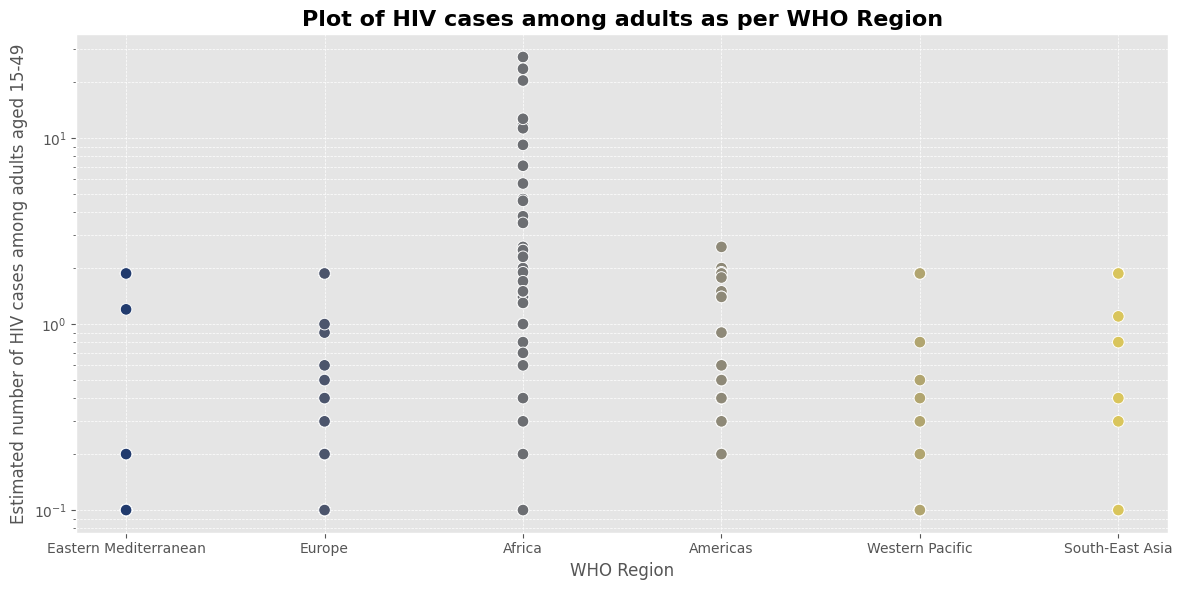

In [101]:
#scatter plot1

plt.figure(figsize=(12, 6))
sns.scatterplot(data=merged_df, x='WHO Region', y='Estimated number of HIV cases among adults aged 15-49', hue= 'WHO Region', palette='cividis', s=70)
plt.title('Plot of HIV cases among adults as per WHO Region', fontsize=16, fontweight='bold')
plt.yscale('log')
plt.xticks(rotation=0)
plt.tight_layout()
plt.xlabel("WHO Region")
plt.ylabel("Estimated number of HIV cases among adults aged 15-49")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend().remove()
plt.show()


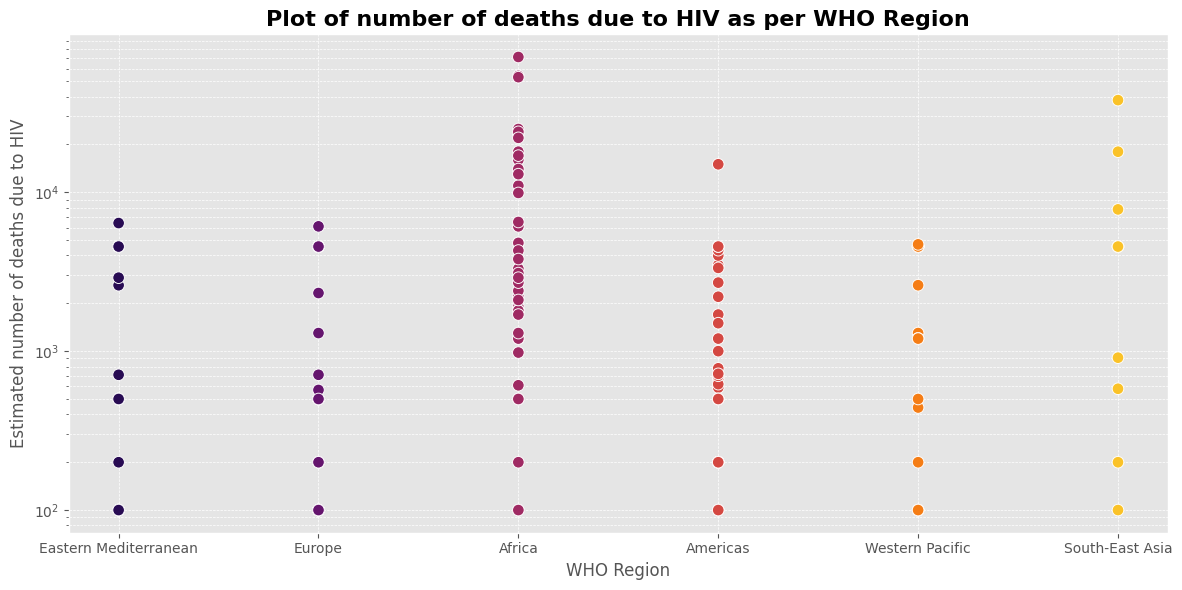

In [102]:
#scatter plot2

plt.figure(figsize=(12, 6))
sns.scatterplot(data=merged_df, x='WHO Region', y='Estimated number of deaths due to HIV', hue= 'WHO Region', palette='inferno', s=70)
plt.title('Plot of number of deaths due to HIV as per WHO Region', fontsize=16, fontweight='bold')
plt.yscale('log')
plt.xticks(rotation=0)
plt.tight_layout()
plt.xlabel("WHO Region")
plt.ylabel("Estimated number of deaths due to HIV")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend().remove()
plt.show()


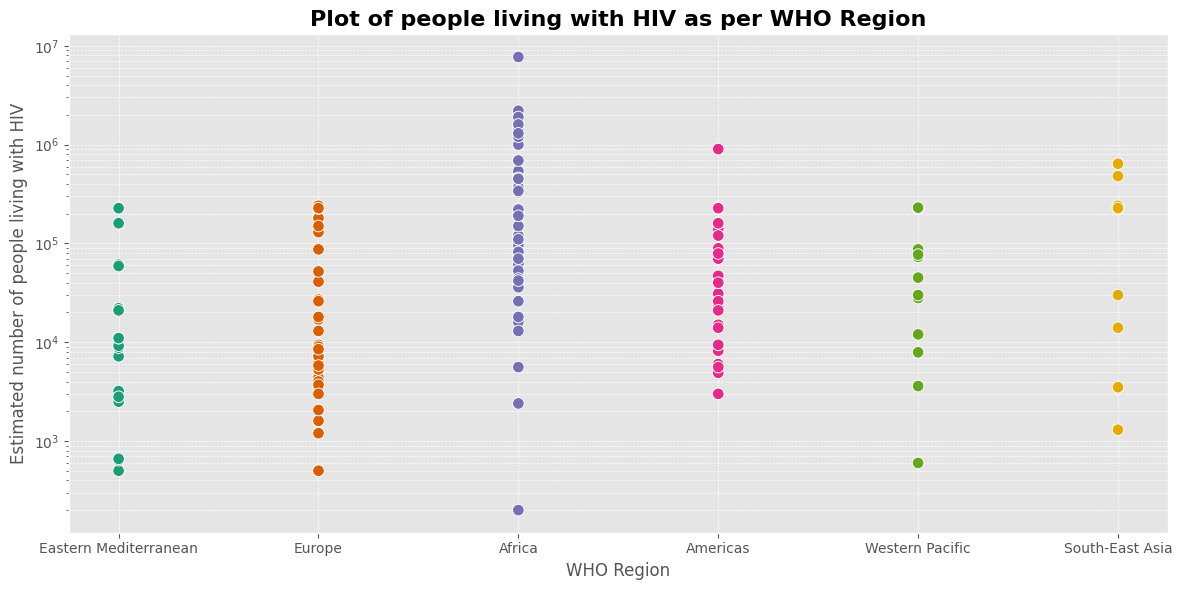

In [103]:
#scatter plot3

plt.figure(figsize=(12, 6))
sns.scatterplot(data=merged_df, x='WHO Region', y='Estimated number of people living with HIV', hue= 'WHO Region', palette='Dark2', s=70)
plt.title('Plot of people living with HIV as per WHO Region', fontsize=16, fontweight='bold')
plt.yscale('log')
plt.xticks(rotation=0)
plt.tight_layout()
plt.xlabel("WHO Region")
plt.ylabel("Estimated number of people living with HIV")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend().remove()
plt.show()



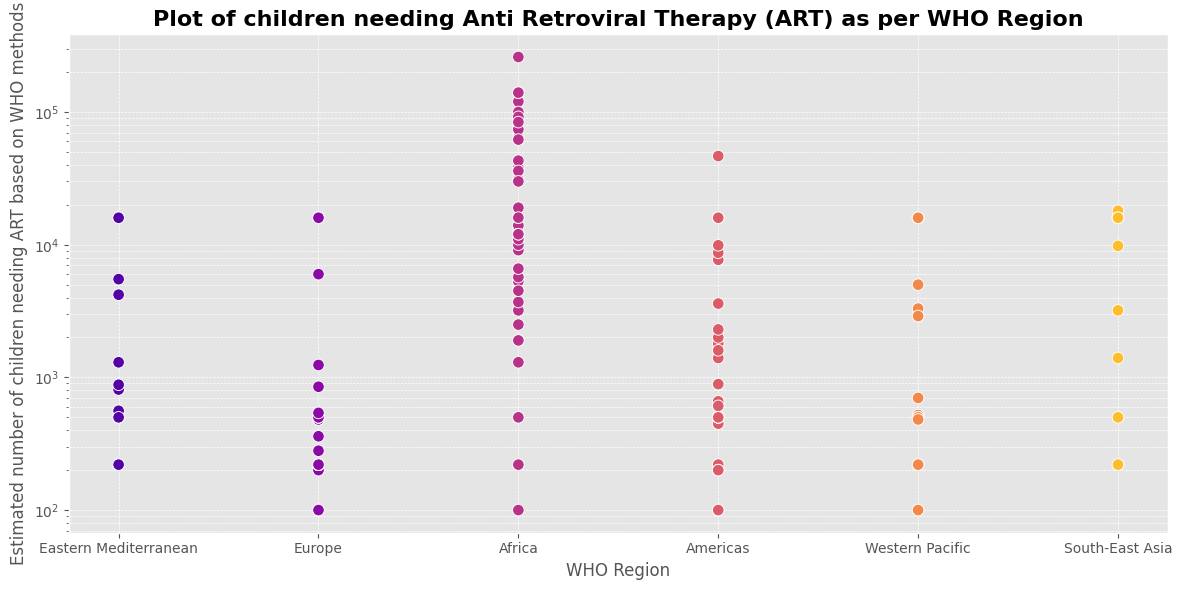

In [104]:
#scatter plot 4

plt.figure(figsize=(12, 6))
sns.scatterplot(data=merged_df, x='WHO Region', y='Estimated number of children needing ART based on WHO methods', hue= 'WHO Region', palette='plasma', s=70)
plt.title('Plot of children needing Anti Retroviral Therapy (ART) as per WHO Region', fontsize=16, fontweight='bold')
plt.yscale('log')
plt.xticks(rotation=0)
plt.tight_layout()
plt.xlabel("WHO Region")
plt.ylabel("Estimated number of children needing ART based on WHO methods")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend().remove()
plt.show()


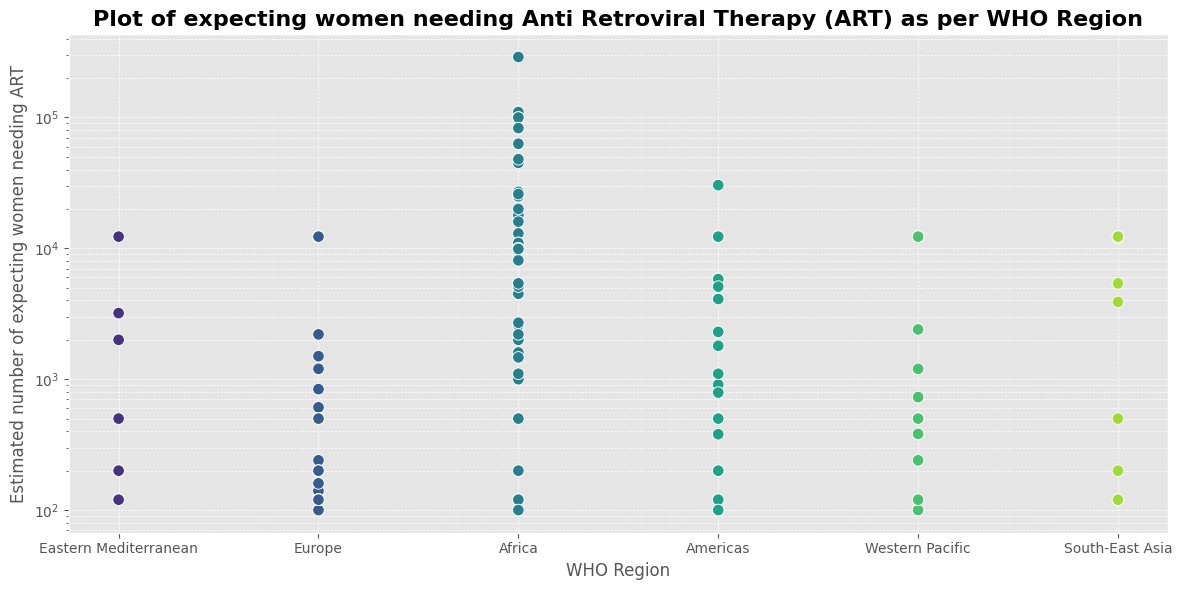

In [121]:
#scatter plot5

plt.figure(figsize=(12, 6))
sns.scatterplot(data=merged_df, x='WHO Region', y='Estimated number of expecting women needing ART', hue= 'WHO Region', palette='viridis', s=70)
plt.title('Plot of expecting women needing Anti Retroviral Therapy (ART) as per WHO Region', fontsize=16, fontweight='bold')
plt.yscale('log')
plt.xticks(rotation=0)
plt.tight_layout()
plt.xlabel("WHO Region")
plt.ylabel("Estimated number of expecting women needing ART")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend().remove()
plt.show()


In [106]:
#correlation heatmap
numerical_merged_df = merged_df[['Estimated number of HIV cases among adults aged 15-49',
                               'Estimated number of deaths due to HIV',
                               'Estimated number of people living with HIV',
                               'Estimated number of children needing ART based on WHO methods',
                               'Estimated number of expecting women needing ART']].dropna()

merged_df_corr = numerical_merged_df.corr(numeric_only=True)
numerical_merged_df

,Estimated number of HIV cases among adults aged 15-49,Estimated number of deaths due to HIV,Estimated number of people living with HIV,Estimated number of children needing ART based on WHO methods,Estimated number of expecting women needing ART
0,0.100000,500.000000,7.200000e+03,500.000000,200.0
1,1.871739,4553.759398,2.273377e+05,15963.921569,12289.4
2,0.100000,200.000000,1.600000e+04,500.000000,500.0
3,2.000000,14000.000000,3.300000e+05,38000.000000,25000.0
4,0.400000,1700.000000,1.400000e+05,1800.000000,1800.0
...,...,...,...,...,...
165,1.780000,3342.000000,1.200000e+05,9900.000000,5100.0
166,0.300000,4700.000000,2.300000e+05,5000.000000,2400.0
167,0.100000,500.000000,1.100000e+04,500.000000,500.0
168,11.300000,17000.000000,1.200000e+06,62000.000000,48000.0


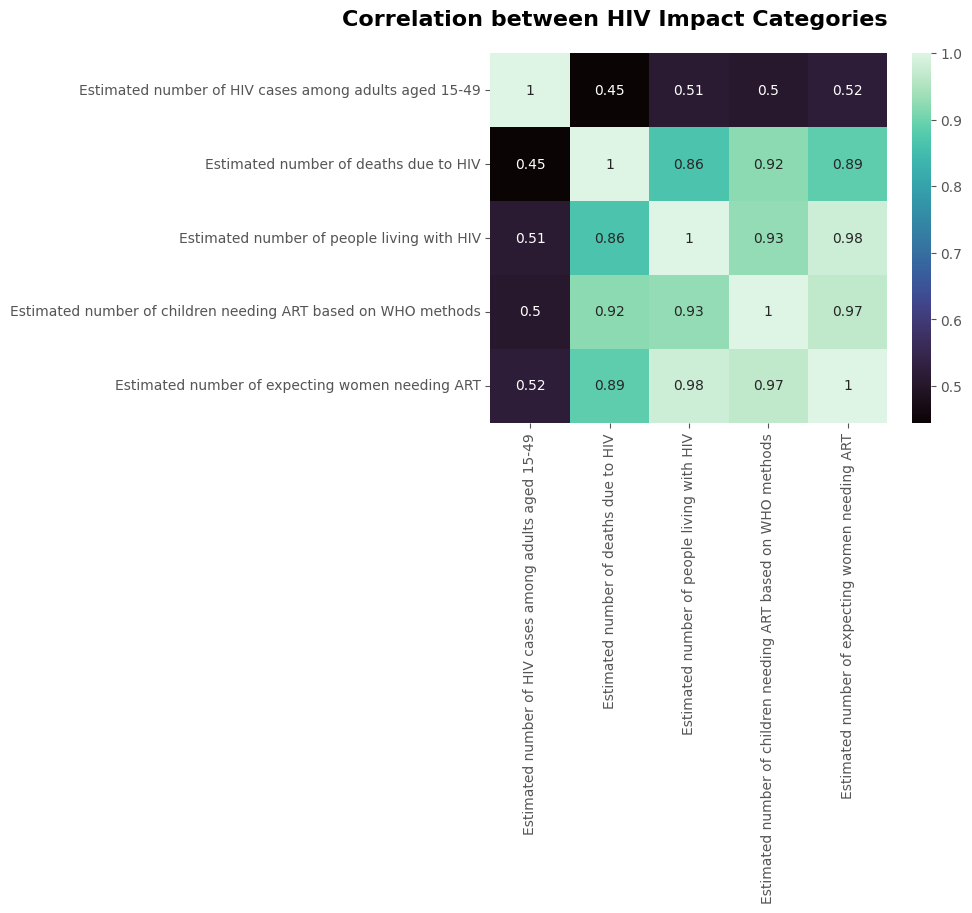

In [107]:
sns.heatmap(merged_df_corr, annot=True, cmap='mako')
plt.title("Correlation between HIV Impact Categories", pad=20, loc='right',fontsize=16, fontweight='bold')
plt.show()

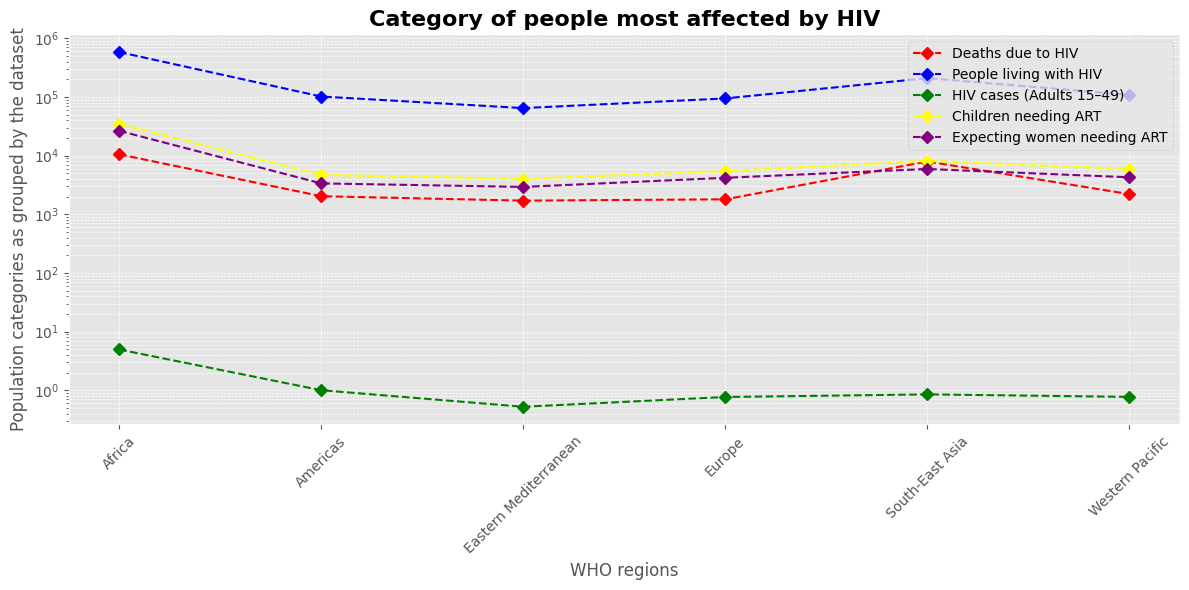

In [108]:
#line plot

# STEP 1: Group and aggregate
grouped = merged_df.groupby('WHO Region', as_index=False).mean(numeric_only=True)
x = grouped['WHO Region']
y1 = grouped['Estimated number of deaths due to HIV']
y2 = grouped['Estimated number of people living with HIV']
y3 = grouped['Estimated number of HIV cases among adults aged 15-49']
y4 = grouped['Estimated number of children needing ART based on WHO methods']
y5 = grouped['Estimated number of expecting women needing ART']
plt.figure(figsize=(12, 6))
plt.plot(x, y1, linestyle= 'dashed', marker= 'D', color= 'red')
plt.plot(x, y2, linestyle= 'dashed', marker= 'D', color= 'blue')
plt.plot(x, y3, linestyle= 'dashed', marker= 'D', color= 'green')
plt.plot(x, y4, linestyle= 'dashed', marker= 'D', color= 'yellow')
plt.plot(x, y5, linestyle= 'dashed', marker= 'D', color= 'purple')
plt.yscale('log')
plt.title('Category of people most affected by HIV', fontsize=16, fontweight='bold')
plt.xlabel('WHO regions')
plt.ylabel('Population categories as grouped by the dataset')
plt.xticks(rotation=45)
plt.legend([
    'Deaths due to HIV',
    'People living with HIV',
    'HIV cases (Adults 15–49)',
    'Children needing ART',
    'Expecting women needing ART'])
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

In [109]:
merged_df

,Country,Estimated number of HIV cases among adults aged 15-49,Estimated number of deaths due to HIV,Estimated number of people living with HIV,Reported number of people receiving AntiRetroviral Therapy (ART),Estimated ART coverage percent among adults living with HIV(%),Reported number of children receiving AntiRetroviral Therapy (ART),Estimated number of children needing ART based on WHO methods,Estimated ART coverage percent among children(%),Reported number of expecting women receiving Anti Retroviral Therapy,Estimated number of expecting women needing ART,Estimated ART coverage percent among expecting mothers(%),WHO Region
0,Afghanistan,0.100000,500.000000,7.200000e+03,920,13.000000,60,500.000000,17.000000,20.0,200.0,11.00000,Eastern Mediterranean
1,Albania,1.871739,4553.759398,2.273377e+05,580,55.551471,20,15963.921569,48.741935,0.0,12289.4,67.51087,Europe
2,Algeria,0.100000,200.000000,1.600000e+04,12800,81.000000,770,500.000000,95.000000,320.0,500.0,74.00000,Africa
3,Angola,2.000000,14000.000000,3.300000e+05,88700,27.000000,4800,38000.000000,13.000000,9600.0,25000.0,38.00000,Africa
4,Argentina,0.400000,1700.000000,1.400000e+05,85500,61.000000,1700,1800.000000,92.000000,1800.0,1800.0,95.00000,Americas
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,Venezuela (Bolivarian Republic of),1.780000,3342.000000,1.200000e+05,0,55.600000,0,9900.000000,37.000000,410.0,5100.0,73.40000,Americas
166,Viet Nam,0.300000,4700.000000,2.300000e+05,150000,65.000000,4600,5000.000000,92.000000,1900.0,2400.0,81.00000,Western Pacific
167,Yemen,0.100000,500.000000,1.100000e+04,2200,21.000000,130,500.000000,33.000000,30.0,500.0,13.00000,Eastern Mediterranean
168,Zambia,11.300000,17000.000000,1.200000e+06,965000,78.000000,49100,62000.000000,79.000000,NaN,48000.0,95.00000,Africa


In [110]:
merged_df.isna().sum()

,0
Country,0
Estimated number of HIV cases among adults aged 15-49,0
Estimated number of deaths due to HIV,0
Estimated number of people living with HIV,0
Reported number of people receiving AntiRetroviral Therapy (ART),0
Estimated ART coverage percent among adults living with HIV(%),0
Reported number of children receiving AntiRetroviral Therapy (ART),0
Estimated number of children needing ART based on WHO methods,0
Estimated ART coverage percent among children(%),0
Reported number of expecting women receiving Anti Retroviral Therapy,18


In [111]:
merged_df['Reported number of expecting women receiving Anti Retroviral Therapy'] = merged_df['Reported number of expecting women receiving Anti Retroviral Therapy'].fillna(0)

In [112]:
merged_df.isna().sum()

,0
Country,0
Estimated number of HIV cases among adults aged 15-49,0
Estimated number of deaths due to HIV,0
Estimated number of people living with HIV,0
Reported number of people receiving AntiRetroviral Therapy (ART),0
Estimated ART coverage percent among adults living with HIV(%),0
Reported number of children receiving AntiRetroviral Therapy (ART),0
Estimated number of children needing ART based on WHO methods,0
Estimated ART coverage percent among children(%),0
Reported number of expecting women receiving Anti Retroviral Therapy,0


In [113]:
merged_df

,Country,Estimated number of HIV cases among adults aged 15-49,Estimated number of deaths due to HIV,Estimated number of people living with HIV,Reported number of people receiving AntiRetroviral Therapy (ART),Estimated ART coverage percent among adults living with HIV(%),Reported number of children receiving AntiRetroviral Therapy (ART),Estimated number of children needing ART based on WHO methods,Estimated ART coverage percent among children(%),Reported number of expecting women receiving Anti Retroviral Therapy,Estimated number of expecting women needing ART,Estimated ART coverage percent among expecting mothers(%),WHO Region
0,Afghanistan,0.100000,500.000000,7.200000e+03,920,13.000000,60,500.000000,17.000000,20.0,200.0,11.00000,Eastern Mediterranean
1,Albania,1.871739,4553.759398,2.273377e+05,580,55.551471,20,15963.921569,48.741935,0.0,12289.4,67.51087,Europe
2,Algeria,0.100000,200.000000,1.600000e+04,12800,81.000000,770,500.000000,95.000000,320.0,500.0,74.00000,Africa
3,Angola,2.000000,14000.000000,3.300000e+05,88700,27.000000,4800,38000.000000,13.000000,9600.0,25000.0,38.00000,Africa
4,Argentina,0.400000,1700.000000,1.400000e+05,85500,61.000000,1700,1800.000000,92.000000,1800.0,1800.0,95.00000,Americas
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,Venezuela (Bolivarian Republic of),1.780000,3342.000000,1.200000e+05,0,55.600000,0,9900.000000,37.000000,410.0,5100.0,73.40000,Americas
166,Viet Nam,0.300000,4700.000000,2.300000e+05,150000,65.000000,4600,5000.000000,92.000000,1900.0,2400.0,81.00000,Western Pacific
167,Yemen,0.100000,500.000000,1.100000e+04,2200,21.000000,130,500.000000,33.000000,30.0,500.0,13.00000,Eastern Mediterranean
168,Zambia,11.300000,17000.000000,1.200000e+06,965000,78.000000,49100,62000.000000,79.000000,0.0,48000.0,95.00000,Africa


In [116]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

data = merged_df.values
np.random.shuffle(data)
X = data[:, 1:12]
y = data[:, -6]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

lm = LinearRegression()
model = lm.fit(x_train,y_train)

y_pred = lm.predict(x_test)

In [117]:
# R2 Score
print(f'R2 score: {lm.score(x_test,y_test)}')

mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)

mse = mean_squared_error(y_true=y_test,y_pred=y_pred)
rmse = root_mean_squared_error(y_true=y_test,y_pred=y_pred)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

R2 score: 1.0
MAE: 1.6140187225948252e-11
MSE: 5.5373617034497e-22
RMSE: 2.353159940048636e-11


In [118]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, root_mean_squared_error
from sklearn.model_selection import train_test_split

data = merged_df.values
np.random.shuffle(data)
X = data[:, 1:12]
y = data[:, 1]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

lm = LinearRegression()
model = lm.fit(x_train,y_train)

y_pred = lm.predict(x_test)

In [119]:
print(f'R2 score: {lm.score(x_test,y_test)}')

mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)

mse = mean_squared_error(y_true=y_test,y_pred=y_pred)
rmse = root_mean_squared_error(y_true=y_test,y_pred=y_pred)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

R2 score: 1.0
MAE: 1.496147976751291e-15
MSE: 5.318067523186556e-30
RMSE: 2.3060935634068616e-15
